In [300]:
from shapely.geometry import LinearRing, Point, Polygon, MultiPolygon
import numpy as np

In [301]:
p = [[(0.0, 0.0), (0.0, 10.0), (10.0, 10.0), (10.0, 0.0)],
     [(3.0,3.0), (6.0, 3.0), (6.0, 6.0), (3.0, 6.0)]]


In [302]:
class Window(Polygon):
    def __init__(self, exterior, interiors=[]):
        if interiors:
            super(Window, self).__init__(exterior, interiors)
        else:
            super(Window, self).__init__(exterior)


        

In [303]:
w = Window(p[0], [p[1]])

In [304]:
w.bounds

(0.0, 0.0, 10.0, 10.0)

In [305]:
wh = Window(p[0])

In [306]:
wh.bounds

(0.0, 0.0, 10.0, 10.0)

In [307]:
wh.contains(Point(3.1, 3.1))

True

In [308]:
w.contains(Point(3.1, 3.1))

False

In [309]:
wh.area

100.0

In [310]:
w.area

91.0

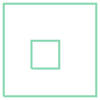

In [311]:
w.boundary

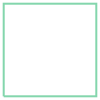

In [312]:
wh.boundary

In [313]:
class Window(Polygon):
    def __init__(self, exterior, interiors=[]):
        if interiors:
            super(Window, self).__init__(exterior, interiors)
        else:
            super(Window, self).__init__(exterior)


    def rpoints(self, n):
        """
        Generate n random points in window
        """
        l, b, r, t = self.bounds
        count = 0
        realization = []
        while count < n:
            xs = np.random.uniform(l, r, (n,1))
            ys = np.random.uniform(b, t, (n,1))
            pnts = [Point(x,y) for x,y in zip(xs, ys)]
            pins = [pnt for pnt in pnts if self.contains(pnt)]
            realization.extend(pins)
            count = len(realization)
        return np.array([np.asarray(p) for p in realization[:n]])
        

In [314]:
wh = Window(p[0], [p[1]])

In [315]:
rh = wh.rpoints(1000)

In [316]:
%matplotlib

Using matplotlib backend: MacOSX


In [317]:
plot(rh[:,0], rh[:,1], ".")

In [318]:
w = Window(p[0])
r = w.rpoints(1000)
plot(r[:,0], r[:,1], ".")

In [319]:
import pysal as ps

In [320]:
ps.examples.explain('burkitt')

{'description': "Burkitt's lymphoma in the Western Nile district of Uganda",
 'explanation': [' * burkitt.dbf attribute file',
  ' * burkitt.shp shapefile',
  ' * burkitt.shx spatial index',
  ' Point data, n=188, k=6 '],
 'name': 'burkitt'}

In [321]:
[(x,y) for x,y in rh if not wh.contains(Point(x,y))]

[]

In [322]:
va = ps.open(ps.examples.get_path("virginia.shp"))
polys = [shp for shp in va]
vapnts = ps.open(ps.examples.get_path("vapoints.shp"))
points = [shp for shp in vapnts]

In [323]:
points

[(-76.75216170576242, 37.78055270999319),
 (-75.46083168601378, 37.94622622304614),
 (-80.57227414995486, 36.56456223295617),
 (-78.42372764998136, 36.56827816125452),
 (-78.49771116466172, 36.71630743916647),
 (-78.67390217869503, 37.51810331473681),
 (-77.81013138862825, 39.00099963043898),
 (-76.83831066666025, 38.00727129403089),
 (-76.28645878858386, 36.876949032328625),
 (-79.39532113977737, 36.850938699560395),
 (-80.4068413700551, 37.04586709045846),
 (-80.27567651481343, 37.69185421332359),
 (-76.30830984007002, 37.43808340057975),
 (-78.13861217912083, 36.83318325925889),
 (-79.23579102989778, 38.29395299597729),
 (-82.98274999670876, 36.625343990860635),
 (-77.07950579610433, 38.12656414011864),
 (-78.3098339967261, 39.37332666657795),
 (-76.58708262908934, 37.64263055291827),
 (-81.63582363613277, 37.13450256785221),
 (-78.34841223544223, 38.98541065839149),
 (-77.66741989604256, 36.966654800208275),
 (-79.09505092361495, 38.297131048086584),
 (-79.88805196489288, 37.097664

In [324]:
from pysal.contrib import shapely_ext

In [325]:
cu = shapely_ext.cascaded_union(polys)

In [326]:
cu

In [327]:
cu.bounding_box.left

-83.67526245117188

In [328]:
cu.bbox

[-83.67526245117188, 36.541481018066406, -75.24258422851562, 39.45690155029297]

In [329]:
w = Window(cu.vertices)

In [330]:
type(cu.bbox)

list

In [331]:
len(cu.parts)

3

In [332]:
polygons = MultiPolygon([Polygon(part) for part in cu.parts])

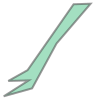

In [333]:
polygons[0]

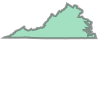

In [334]:
polygons[1]

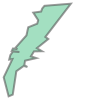

In [335]:
polygons[2]

In [336]:
polygons[1].area

10.35746430780273

In [337]:
polygons[2].area

0.15129774823435582

In [338]:
polygons[0].area

0.003373810090124607

In [339]:
type(polygons)

shapely.geometry.multipolygon.MultiPolygon

In [340]:
polygons.contains(Point(83.7, -43.0))

False

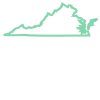

In [341]:
polygons.boundary

In [342]:
polygons.bounds

(-83.67526245117188, 36.541481018066406, -75.24258422851562, 39.45690155029297)

In [343]:
cuu = shapely_ext.unary_union(polys)

In [344]:
type(cuu)

pysal.cg.shapes.Polygon

In [345]:
len(cuu.parts)

3

In [346]:
cuu.contains_point(points[0])

True

In [347]:
pin = [ p for p in points if cuu.contains_point(p)]

In [348]:
len(pin)

400

In [349]:
class Window(ps.cg.shapes.Polygon):
    def __init__(self, exterior, interiors=[]):
        if interiors:
            super(Window, self).__init__(exterior, interiors)
        else:
            super(Window, self).__init__(exterior)


    def rpoints(self, n):
        """
        Generate n random points in window
        """
        l, b, r, t = self.bbox
        count = 0
        realization = []
        while count < n:
            xs = np.random.uniform(l, r, (n,1))
            ys = np.random.uniform(b, t, (n,1))
            pnts = [ps.cg.shapes.Point((x,y)) for x,y in zip(xs, ys)]
            pins = [pnt for pnt in pnts if self.contains_point(pnt)]
            realization.extend(pins)
            count = len(realization)
        return np.array([np.asarray(p) for p in realization[:n]])

In [350]:
type(cuu)

pysal.cg.shapes.Polygon

In [351]:
w = Window(cuu.parts)

In [352]:
rp = w.rpoints(100)

In [353]:
rp

array([[-75.59073141,  37.74465941],
       [-77.41930558,  37.38446116],
       [-79.07014742,  37.6750361 ],
       [-79.89660529,  37.7357574 ],
       [-81.94328474,  37.37457462],
       [-82.95447122,  36.78094092],
       [-76.98063346,  37.94205608],
       [-76.50257069,  37.44336677],
       [-82.75123787,  36.71491741],
       [-79.55463909,  38.34248103],
       [-76.83267107,  36.89851976],
       [-76.92695459,  38.06098947],
       [-78.29374874,  37.38232086],
       [-82.30620957,  37.09970942],
       [-78.34428921,  36.59085352],
       [-80.0929276 ,  36.74574796],
       [-79.76426019,  37.47096112],
       [-78.65293476,  37.66974102],
       [-78.39883153,  36.61920609],
       [-78.41366772,  38.50706479],
       [-80.07892921,  37.02136772],
       [-77.13547596,  37.20974938],
       [-77.56406153,  37.04390113],
       [-78.83957237,  36.55440334],
       [-76.80544262,  37.84063126],
       [-82.23283673,  36.71429583],
       [-77.46222422,  36.88200222],
 

In [354]:
poly_with_holes = [ i for i,poly in enumerate(polys) if poly.holes !=[[]]]

In [355]:
len(poly_with_holes)

15

In [356]:
poly_with_holes

[0, 5, 8, 14, 22, 30, 38, 46, 63, 77, 99, 104, 110, 120, 126]

In [357]:
p0 = polys[0]

In [358]:
p0.holes

[[(-78.13279724121094, 39.19164276123047),
  (-78.13968658447266, 39.16486740112305),
  (-78.16258239746094, 39.138458251953125),
  (-78.20548248291016, 39.157711029052734),
  (-78.20503997802734, 39.173126220703125),
  (-78.1827621459961, 39.20271301269531),
  (-78.13279724121094, 39.19164276123047)]]

In [359]:
p0h0 = ps.cg.shapes.Polygon(p0.holes[0])

In [360]:
p0h0.centroid

(-78.16982139821643, 39.17234989644497)

In [361]:
p0h0.contains_point(p0h0.centroid)

True

In [362]:
p0.contains_point(p0h0.centroid)

False

In [363]:
w0 = Window(p0.parts, p0.holes)

In [364]:
w0.contains_point(p0h0.centroid)

False

In [365]:
w0no_hole = Window(p0.parts)

In [366]:
w0no_hole.contains_point(p0h0.centroid)

True

In [367]:
r0 = w0.rpoints(1000)

In [368]:
r0no_hole = w0no_hole.rpoints(1000)

In [369]:
r0no_hole

array([[-78.16022236,  39.09582186],
       [-78.50033041,  39.05702197],
       [-78.31604961,  39.23638629],
       ..., 
       [-78.33214521,  39.1492171 ],
       [-78.44314335,  39.09133432],
       [-78.40721158,  39.12333043]])

In [370]:
pp = [ps.cg.shapes.Point((p[0],p[1])) for p in r0no_hole]

In [371]:
pnin = [p for p in pp if not w0.contains_point(p)] 

In [372]:
len(pnin)

31

In [373]:
w0.bbox

[-78.53691864013672, 39.0107421875, -78.03360748291016, 39.45690155029297]

In [374]:
def poly_from_bbox(bbox):
    l, b, r, t = bbox
    c = [(l, b), (l, t), (r, t), (r, b), (l,b)]
    return ps.cg.shapes.Polygon(c)


In [375]:
r = poly_from_bbox(w0.bbox)

In [376]:
r.centroid

(-78.28526306152318, 39.23382186889667)

In [377]:
r.parts

[[(-78.53691864013672, 39.0107421875),
  (-78.53691864013672, 39.45690155029297),
  (-78.03360748291016, 39.45690155029297),
  (-78.03360748291016, 39.0107421875),
  (-78.53691864013672, 39.0107421875)]]